### LSTM model (1 feature)

In [32]:
# Import essential libraries 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras

In [33]:
# Remove the unnecessary data columns 
df = pd.read_csv('cleaned-df3.csv')
new_df = pd.DataFrame(df, columns=['downloads', 'run_time', 'views', 'IMDb-rating'])
new_df

,downloads,run_time,views,IMDb-rating
0,304.0,105.0,2794.0,4.8
1,73.0,84.0,1002.0,6.4
2,1427.0,107.0,14419.0,5.2
3,1781.0,116.0,18225.0,6.5
4,458.0,80.0,6912.0,6.9
...,...,...,...,...
8424,41145.0,83.0,66860.0,7.6
8425,9551.0,87.0,25581.0,3.3
8426,8953.0,98.0,33431.0,3.6
8427,1932.0,158.0,6076.0,7.1


In [9]:
# Reshape 'downloads' and check  
df1 = df['downloads'].values
df1 = np.reshape(df1, (-1,1))
print(df1.shape)
df1

(8429, 1)


array([[  304.],
       [   73.],
       [ 1427.],
       ...,
       [ 8953.],
       [ 1932.],
       [12284.]])

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(df1)
print(data_set_scaled)

# Multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(1):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

print(len(X))

[[0.00077695]
 [0.00018657]
 [0.00364708]
 ...
 [0.02288178]
 [0.00493774]
 [0.03139504]]
8429
1


In [12]:
# Move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# -1 for last column
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

# y=sc.fit_transform(yi)
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape) 
print(y)
print(y.shape)

[[[0.00077695]
  [0.00018657]
  [0.00364708]
  ...
  [0.02689178]
  [0.00088685]
  [0.00453649]]

 [[0.00018657]
  [0.00364708]
  [0.00455182]
  ...
  [0.00088685]
  [0.00453649]
  [0.00042681]]

 [[0.00364708]
  [0.00455182]
  [0.00117054]
  ...
  [0.00453649]
  [0.00042681]
  [0.00119865]]

 ...

 [[0.05375289]
  [0.03315341]
  [0.00807622]
  ...
  [0.01392126]
  [0.10515703]
  [0.02441013]]

 [[0.03315341]
  [0.00807622]
  [0.08467   ]
  ...
  [0.10515703]
  [0.02441013]
  [0.02288178]]

 [[0.00807622]
  [0.08467   ]
  [0.03972684]
  ...
  [0.02441013]
  [0.02288178]
  [0.00493774]]]
(8399, 30, 1)
[[0.00042681]
 [0.00119865]
 [0.02301724]
 ...
 [0.02288178]
 [0.00493774]
 [0.03139504]]
(8399, 1)


#### The shape of (8399,30,1) means there are 8399 rows in total, 30 backcandles and 1 feature 

In [13]:
# Split data into train and test sets 
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

6719
(6719, 30, 1)
(1680, 30, 1)
(6719, 1)
(1680, 1)
[[0.00042681]
 [0.00119865]
 [0.02301724]
 ...
 [0.02109786]
 [0.03090944]
 [0.05352031]]


In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed 
from tensorflow.keras.layers import Activation 
from tensorflow.keras.layers import concatenate 
from tensorflow.keras.layers import Input 

from tensorflow.keras import optimizers 
from tensorflow.keras.callbacks import History 

np.random.seed(10)

lstm_input = Input(shape=(backcandles, 1), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Train on 6047 samples, validate on 672 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
6047/6047 [==============================] - 21s 3ms/sample - loss: 0.0074 - val_loss: 0.0059
Epoch 2/30
6047/6047 [==============================] - 20s 3ms/sample - loss: 0.0073 - val_loss: 0.0055
Epoch 3/30
6047/6047 [==============================] - 22s 4ms/sample - loss: 0.0073 - val_loss: 0.0055
Epoch 4/30
6047/6047 [==============================] - 24s 4ms/sample - loss: 0.0073 - val_loss: 0.0058
Epoch 5/30
6047/6047 [==============================] - 25s 4ms/sample - loss: 0.0073 - val_loss: 0.0056
Epoch 6/30
6047/6047 [==============================] - 27s 4ms/sample - loss: 0.0073 - val_loss: 0.0056
Epoch 7/30
6047/6047 [==============================] - 24s 4ms/sample - loss: 0.0073 - val_loss: 0.0066
Epoch 8/30
6047/6047 [==============================] - 23s 4ms/sample - loss: 0.0073 - val_loss: 0.0055
Epoch 9/30
6047/604

In [26]:
# Numerical comparison of 10 sets 
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

[0.04084035] [0.15176399]
[0.05478995] [0.02983347]
[0.03746362] [0.14364432]
[0.05657393] [0.10806038]
[0.05281267] [0.02743105]
[0.03985288] [0.03087366]
[0.04304282] [0.02874215]
[0.04185375] [0.12439684]
[0.05280559] [0.09214306]
[0.04715222] [0.10483756]


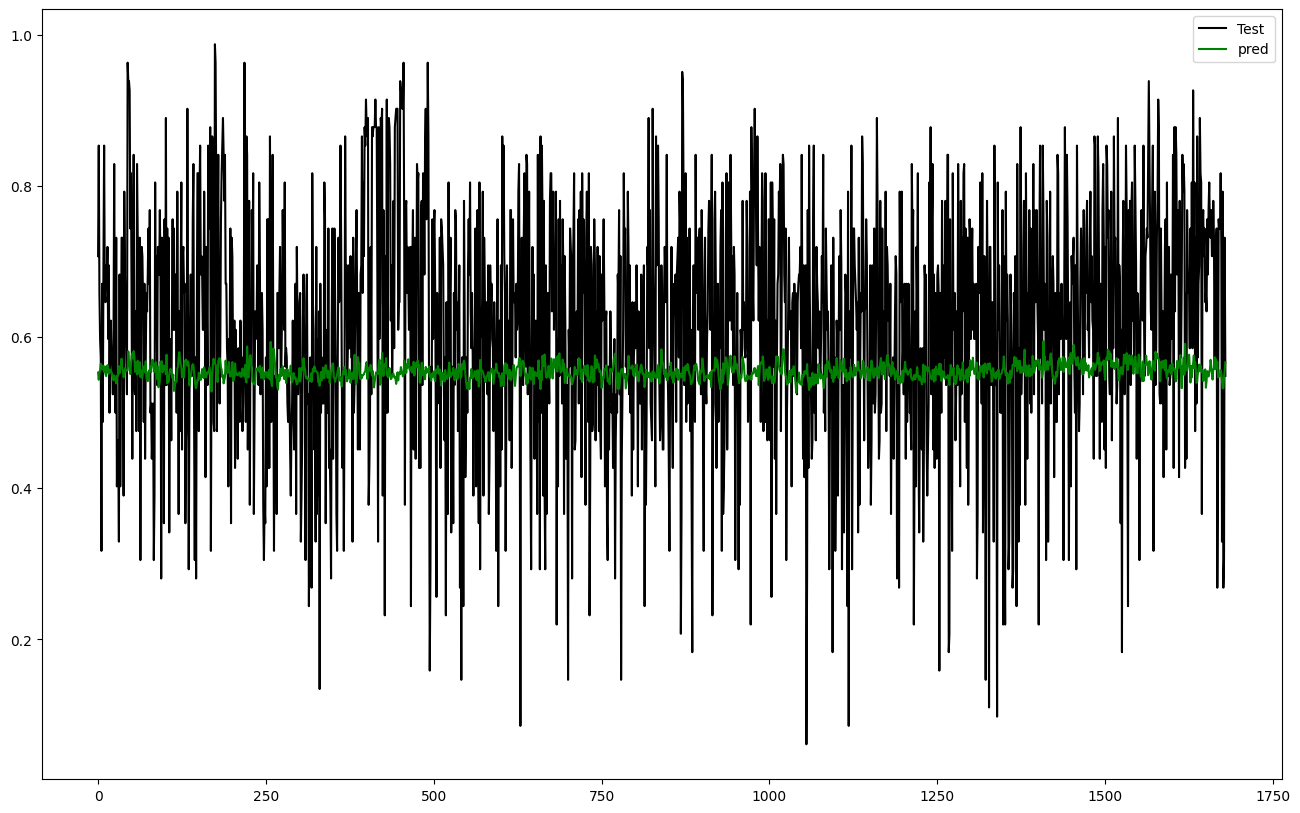

In [28]:
plt.figure(figsize=(16,10))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

### LSTM model (2 features) 

In [18]:
# Remove the unnecessary data columns 
new_df = pd.DataFrame(df, columns=['downloads', 'run_time', 'views', 'IMDb-rating'])
new_df

,downloads,run_time,views,IMDb-rating
0,304.0,105.0,2794.0,4.8
1,73.0,84.0,1002.0,6.4
2,1427.0,107.0,14419.0,5.2
3,1781.0,116.0,18225.0,6.5
4,458.0,80.0,6912.0,6.9
...,...,...,...,...
8424,41145.0,83.0,66860.0,7.6
8425,9551.0,87.0,25581.0,3.3
8426,8953.0,98.0,33431.0,3.6
8427,1932.0,158.0,6076.0,7.1


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(new_df)
print(data_set_scaled)

# Multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
# Range of 3 since there are only 3 feature variables 
for j in range(3):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

print(len(X))

[[7.76953117e-04 2.80000000e-01 1.09433043e-03 4.51219512e-01]
 [1.86570979e-04 2.10000000e-01 0.00000000e+00 6.46341463e-01]
 [3.64707927e-03 2.86666667e-01 8.19343267e-03 5.00000000e-01]
 ...
 [2.28817804e-02 2.56666667e-01 1.98035946e-02 3.04878049e-01]
 [4.93774152e-03 4.56666667e-01 3.09856729e-03 7.31707317e-01]
 [3.13950398e-02 2.30000000e-01 2.13858547e-02 5.48780488e-01]]
8429
3


In [20]:
# Move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# Choose -1 for last column
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

print(X)
print(X.shape) 
print(y)
print(y.shape)

[[[7.76953117e-04 2.80000000e-01 1.09433043e-03]
  [1.86570979e-04 2.10000000e-01 0.00000000e+00]
  [3.64707927e-03 2.86666667e-01 8.19343267e-03]
  ...
  [2.68917786e-02 3.80000000e-01 2.94699764e-02]
  [8.86851091e-04 2.10000000e-01 1.51020042e-03]
  [4.53648613e-03 2.63333333e-01 8.07129758e-03]]

 [[1.86570979e-04 2.10000000e-01 0.00000000e+00]
  [3.64707927e-03 2.86666667e-01 8.19343267e-03]
  [4.55182073e-03 3.16666667e-01 1.05176635e-02]
  ...
  [8.86851091e-04 2.10000000e-01 1.51020042e-03]
  [4.53648613e-03 2.63333333e-01 8.07129758e-03]
  [4.26813061e-04 2.56666667e-01 9.09906438e-04]]

 [[3.64707927e-03 2.86666667e-01 8.19343267e-03]
  [4.55182073e-03 3.16666667e-01 1.05176635e-02]
  [1.17054121e-03 1.96666667e-01 3.60909198e-03]
  ...
  [4.53648613e-03 2.63333333e-01 8.07129758e-03]
  [4.26813061e-04 2.56666667e-01 9.09906438e-04]
  [1.19865464e-03 3.30000000e-01 3.71412816e-03]]

 ...

 [[5.37528880e-02 2.93333333e-01 3.50607103e-02]
  [3.31534073e-02 4.76666667e-01 2.0017

#### The shape of (8399,30,3) means there are 8399 rows in total, 30 backcandles, 3 variables 

In [22]:
# Split data into train and test sets 
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

6719
(6719, 30, 3)
(1680, 30, 3)
(6719, 1)
(1680, 1)
[[0.58536585]
 [0.3902439 ]
 [0.3902439 ]
 ...
 [0.52439024]
 [0.54878049]
 [0.80487805]]


In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed 
from tensorflow.keras.layers import Activation 
from tensorflow.keras.layers import concatenate 
from tensorflow.keras.layers import Input 

from tensorflow.keras import optimizers 
from tensorflow.keras.callbacks import History 
np.random.seed(30)

lstm_input = Input(shape=(backcandles, 3), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Train on 6047 samples, validate on 672 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
6047/6047 [==============================] - 56s 9ms/sample - loss: 0.0266 - val_loss: 0.0231
Epoch 2/30
6047/6047 [==============================] - 51s 8ms/sample - loss: 0.0226 - val_loss: 0.0236
Epoch 3/30
6047/6047 [==============================] - 42s 7ms/sample - loss: 0.0224 - val_loss: 0.0216
Epoch 4/30
6047/6047 [==============================] - 27s 5ms/sample - loss: 0.0224 - val_loss: 0.0216
Epoch 5/30
6047/6047 [==============================] - 27s 4ms/sample - loss: 0.0223 - val_loss: 0.0216
Epoch 6/30
6047/6047 [==============================] - 28s 5ms/sample - loss: 0.0222 - val_loss: 0.0234
Epoch 7/30
6047/6047 [==============================] - 27s 4ms/sample - loss: 0.0221 - val_loss: 0.0224
Epoch 8/30
6047/6047 [==============================] - 27s 5ms/sample - loss: 0.0220 - val_loss: 0.0222
Epoch 9/30
6047/604

In [26]:
# Numerical comparison of 10 sets 
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

[0.55310374] [0.70731707]
[0.54358846] [0.85365854]
[0.5524519] [0.65853659]
[0.55646145] [0.59756098]
[0.5647119] [0.57317073]
[0.5597063] [0.31707317]
[0.5571772] [0.67073171]
[0.56241333] [0.48780488]
[0.55923975] [0.69512195]
[0.55396724] [0.85365854]


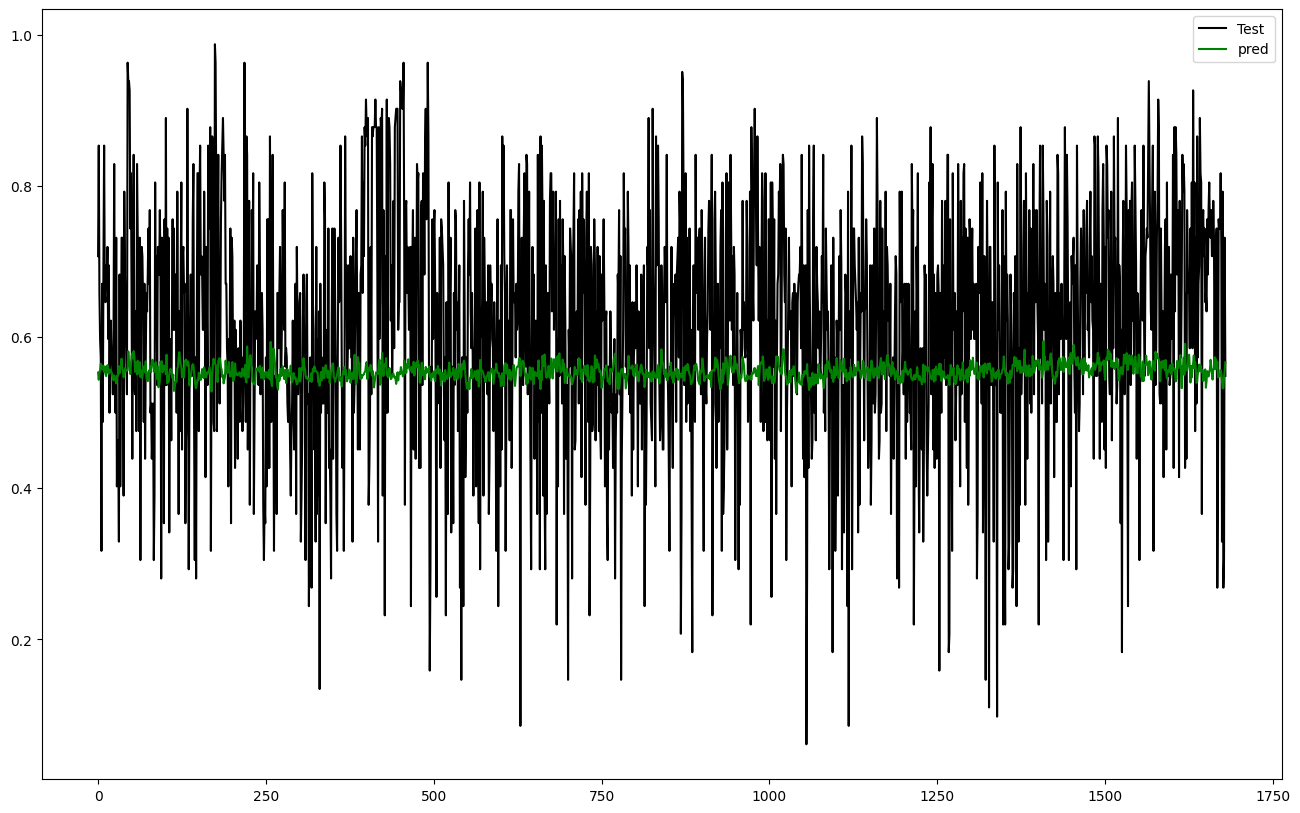

In [31]:
plt.figure(figsize=(16,10))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()